In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib 
from matplotlib.ticker import AutoMinorLocator
import os

os.makedirs('Plots', exist_ok=True)

# Set plot style
sns.set(style="darkgrid")
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('axes', titlesize=24)     # fontsize of the axes title
plt.rc('axes', labelsize=18)
matplotlib.rc('font', **font)

In [8]:
# Load Data
df = pd.read_csv('clean_history_data.csv')

In [9]:
# ==========================================================================================
# 1. DATA OVERVIEW
# ==========================================================================================

# Basic info
print("Data Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

# Check for duplicates
print("\nDuplicate Entries:", df.duplicated().sum())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         9 non-null      int64  
 1   quiz_id                    9 non-null      int64  
 2   user_id                    9 non-null      object 
 3   submitted_at               9 non-null      object 
 4   created_at                 9 non-null      object 
 5   updated_at                 9 non-null      object 
 6   score                      9 non-null      int64  
 7   trophy_level               9 non-null      int64  
 8   accuracy                   9 non-null      float64
 9   speed                      9 non-null      float64
 10  final_score                9 non-null      float64
 11  negative_score             9 non-null      float64
 12  correct_answers            9 non-null      int64  
 13  incorrect_answers          9 non-null      

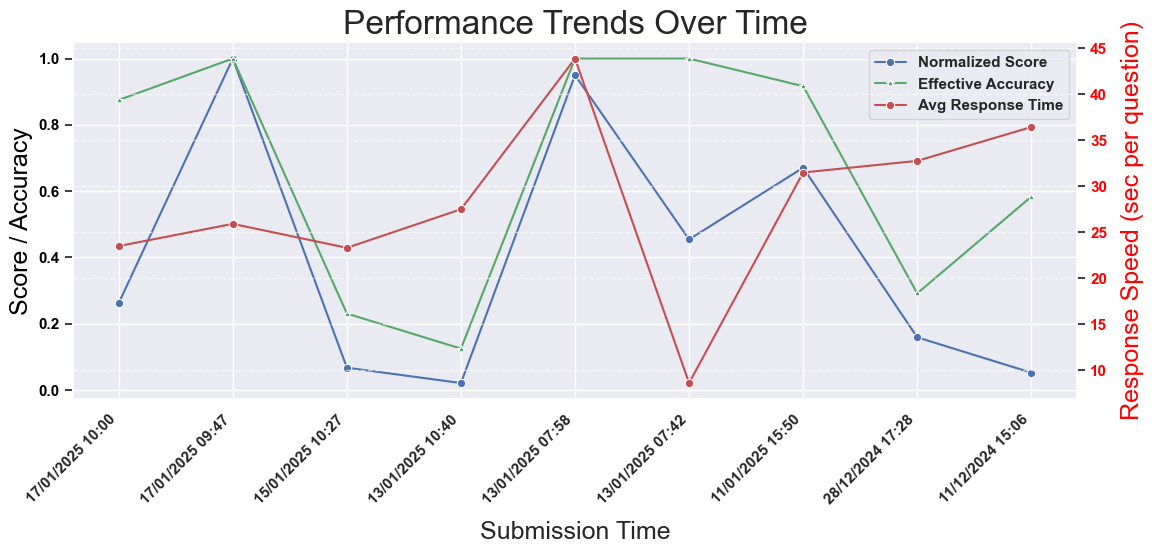

In [11]:
# ==========================================================================================
# 2. Performance Trends Over Time
# ==========================================================================================

df["submitted_at"] = pd.to_datetime(df["submitted_at"],dayfirst=True)
df["submitted_at"] = df["submitted_at"].dt.strftime("%d/%m/%Y %H:%M")

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Normalized Score and Accuracy on Primary Y-Axis
sns.lineplot(ax=ax1, x="submitted_at", y="normalized_score", data=df, marker="o", color="b", label="Normalized Score")
sns.lineplot(ax=ax1, x="submitted_at", y="effective_accuracy", data=df, marker="*", color="g", label="Effective Accuracy")

ax1.set_ylabel("Score / Accuracy", color="black")  
ax1.set_xlabel("Submission Time",labelpad=10)  
ax1.tick_params(axis="y", labelcolor="black")

# Create Secondary Y-Axis for Response Speed
ax2 = ax1.twinx()
sns.lineplot(ax=ax2, x="submitted_at", y="avg_response_time", data=df, marker="o", color="r", label="Avg Response Time")
ax2.set_ylabel("Response Speed (sec per question)", color="red",labelpad = 10)
ax2.tick_params(axis="y", labelcolor="red")
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha="right")  # Rotate labels
ax2.legend_.remove()
# Combine Legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right")
#plt.legend()
plt.title("Performance Trends Over Time")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig('Plots/time_analysis',dpi=200)


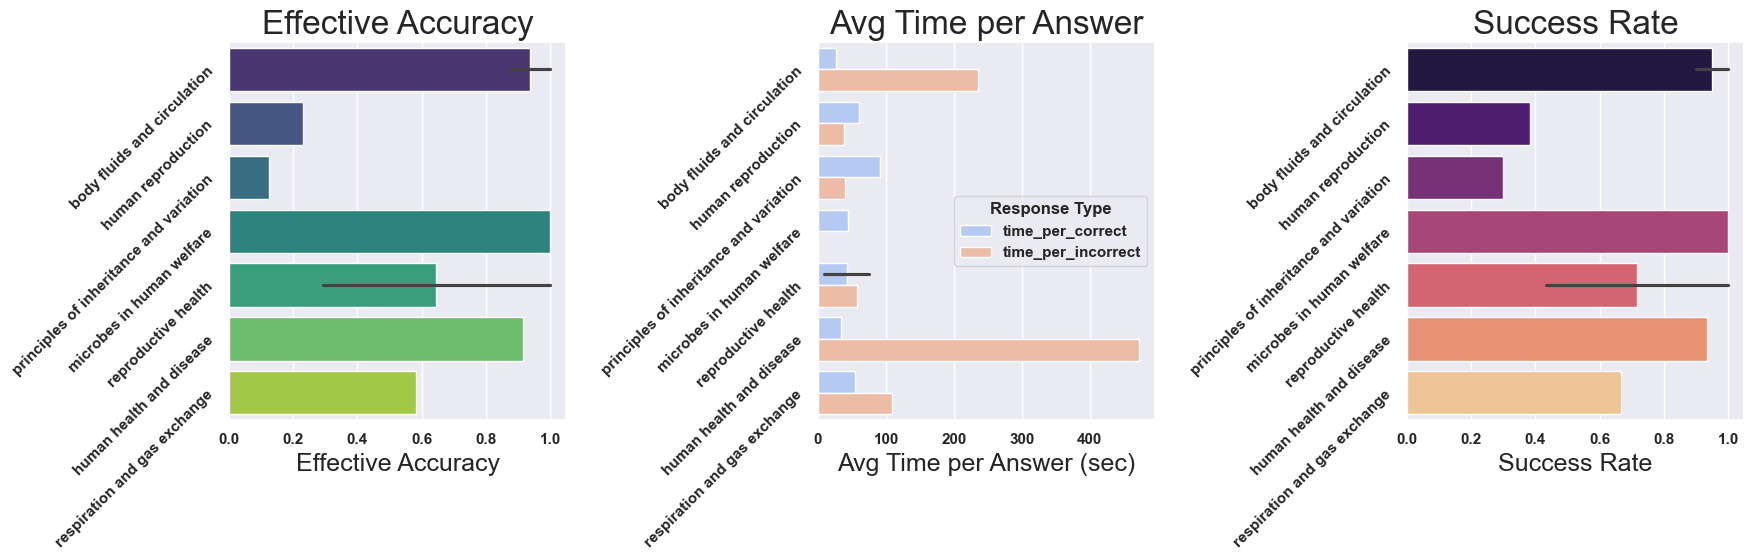

In [12]:
# ==========================================================================================
# 2. Performance Trends By Topic
# ==========================================================================================

melted_df = df.melt(id_vars=["standardized_quiz_topic"], 
                      value_vars=["time_per_correct", "time_per_incorrect"],
                      var_name="Response Type", value_name="Time Taken")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
#fig.subplots_adjust(wspace=10)
# Accuracy vs. Topic
sns.barplot(ax=axes[0], x="effective_accuracy", y="standardized_quiz_topic", hue="standardized_quiz_topic", 
            data=df, palette="viridis", legend=False)
axes[0].set_title("Effective Accuracy")

# Avg Time per Correct & Incorrect Answer vs. Topic (Overlapping Bars)
sns.barplot(ax=axes[1], x="Time Taken", y="standardized_quiz_topic", hue="Response Type", 
            data=melted_df, palette="coolwarm", dodge=True)  # dodge=True ensures bars overlap slightly
axes[1].set_title("Avg Time per Answer")

# Success Rate vs. Topic
sns.barplot(ax=axes[2], x="success_rate", y="standardized_quiz_topic", hue="standardized_quiz_topic", 
            data=df, palette="magma", legend=False)
axes[2].set_title("Success Rate")

# Rotate y-ticks for better readability
for ax in axes:
    plt.setp(ax.yaxis.get_majorticklabels(), rotation=45, ha="right")  # Rotate y-tick labels
    ax.set_ylabel("")

# Manually set x-axis labels (removing defaults)
axes[0].set_xlabel("Effective Accuracy")
axes[1].set_xlabel("Avg Time per Answer (sec)")
axes[2].set_xlabel("Success Rate")

plt.tight_layout()
plt.savefig('Plots/topic_analysis',dpi=200)


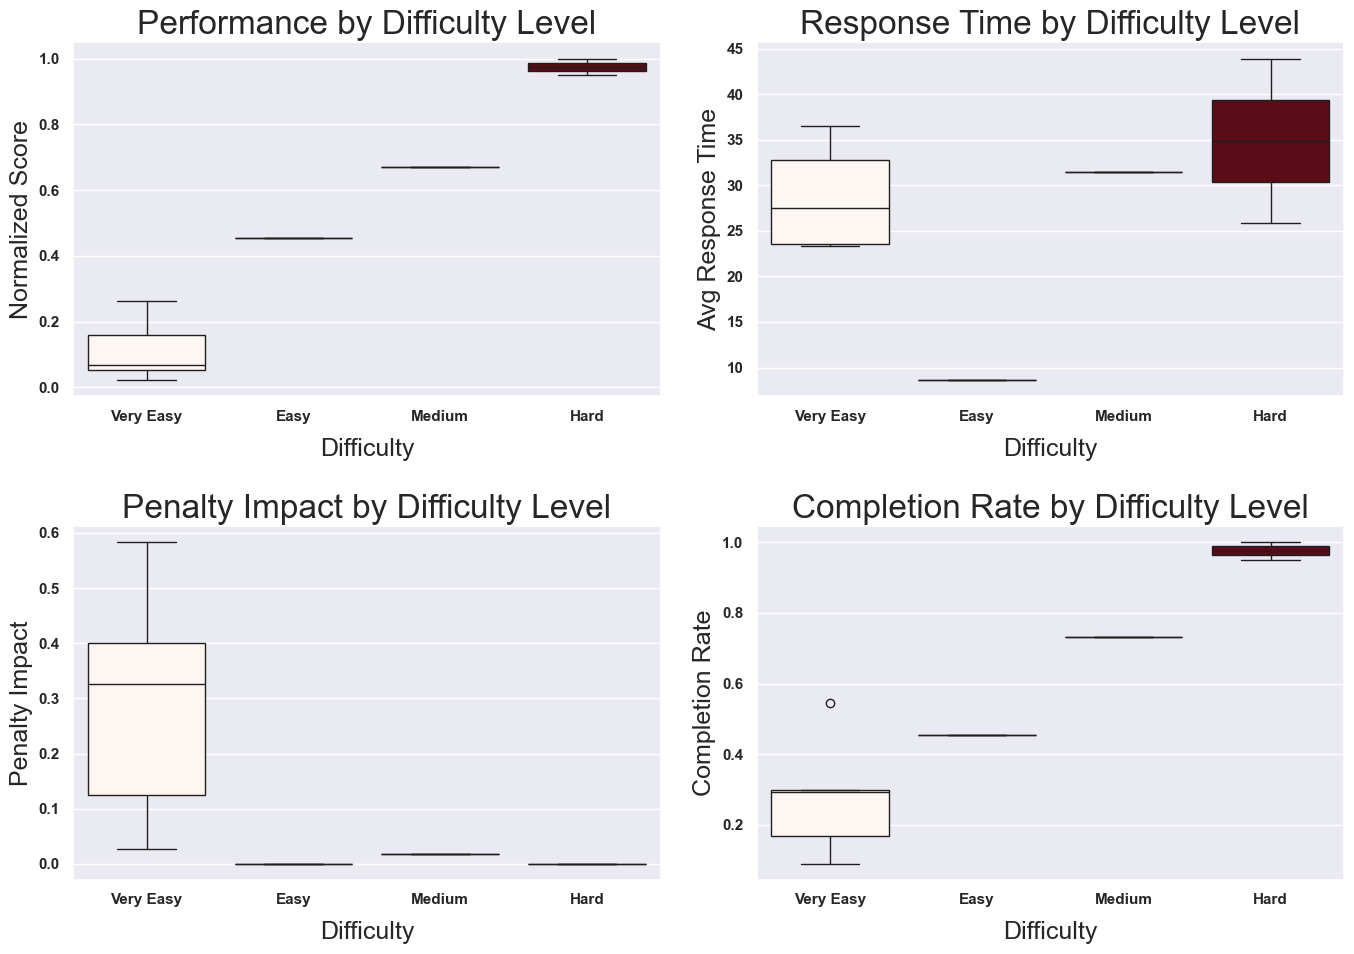

In [13]:
## ------------------ 3. Difficulty Level Analysis ------------------ ##
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Performance by Difficulty Level
sns.boxplot(ax=axes[0,0], x="difficulty", y="normalized_score", hue="difficulty", data=df, palette="Reds",legend = False)
axes[0,0].set_title("Performance by Difficulty Level")
axes[0,0].set_ylabel("Normalized Score")

# Average Response Time by Difficulty
sns.boxplot(ax=axes[0,1], x="difficulty", y="avg_response_time", hue="difficulty", data=df, palette="Reds",legend = False)
axes[0,1].set_title("Response Time by Difficulty Level")
axes[0,1].set_ylabel("Avg Response Time")

# Average Response Time by Difficulty
sns.boxplot(ax=axes[1,0], x="difficulty", y="penalty_impact", hue="difficulty", data=df, palette="Reds",legend = False)
axes[1,0].set_title("Penalty Impact by Difficulty Level")
axes[1,0].set_ylabel("Penalty Impact")

# Average Response Time by Difficulty
sns.boxplot(ax=axes[1,1], x="difficulty", y="completion_rate", hue="difficulty", data=df, palette="Reds",legend = False)
axes[1,1].set_title("Completion Rate by Difficulty Level")
axes[1,1].set_ylabel("Completion Rate")

for ax in axes.flat:
    ax.set_xlabel("Difficulty",labelpad = 10)
    ax.set_xticks([0, 1, 2, 3])  # Set tick positions
    ax.set_xticklabels(["Very Easy", "Easy", "Medium", "Hard"])  # Set tick labels
    ax.xaxis.set_minor_locator(AutoMinorLocator())  # Add minor ticks
    
plt.tight_layout()
plt.savefig('Plots/difficulty_level_analysis',dpi=200)

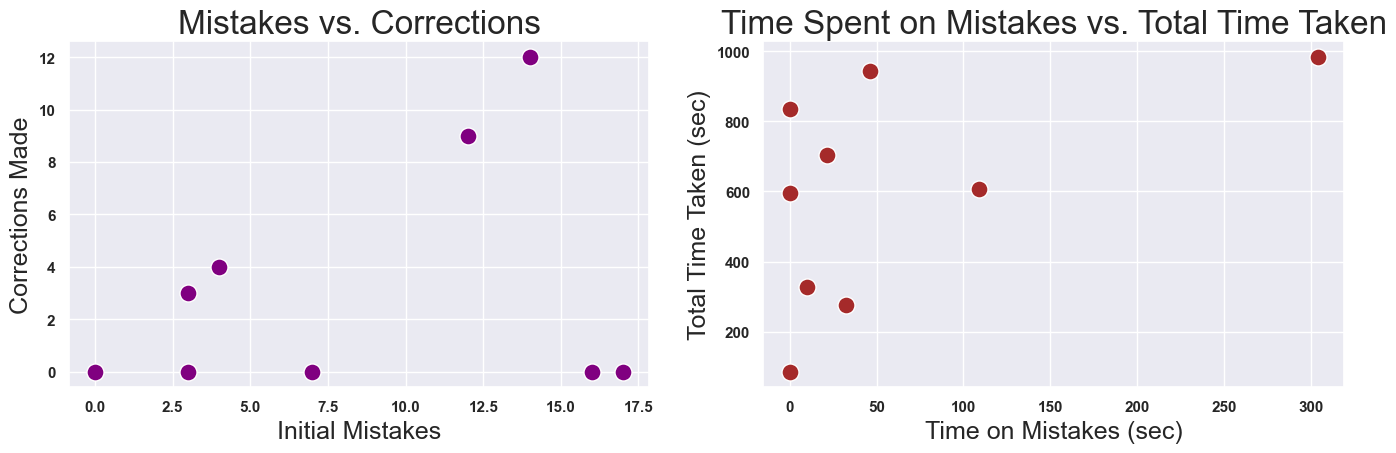

In [15]:
## ------------------ 4. Mistake and Correction Analysis ------------------ ##
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Mistakes vs. Corrections
sns.scatterplot(ax=axes[0], x="initial_mistake_count", y="mistakes_corrected", data=df,  color="purple",s=150)
axes[0].set_title("Mistakes vs. Corrections")
axes[0].set_xlabel("Initial Mistakes")
axes[0].set_ylabel("Corrections Made")
# Time spent on mistakes vs. total time
sns.scatterplot(ax=axes[1], x="time_on_mistakes", y="total_time_taken", data=df, color="brown",s=150)
axes[1].set_title("Time Spent on Mistakes vs. Total Time Taken")
axes[1].set_xlabel("Time on Mistakes (sec)")
axes[1].set_ylabel("Total Time Taken (sec)")
plt.tight_layout()
plt.savefig('Plots/mistake_correction_analysis',dpi=200)

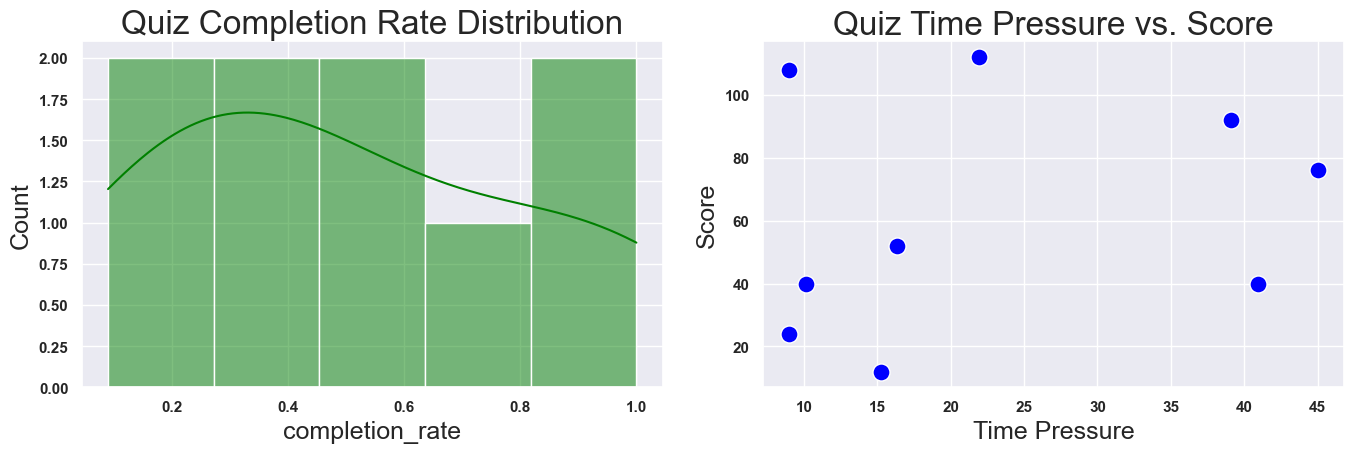

In [16]:
 ## ------------------ 5. Completion and Engagement Analysis ------------------ ##
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Quiz Completion Rate Distribution
sns.histplot(ax=axes[0], x="completion_rate", data=df, kde=True, color="green")
axes[0].set_title("Quiz Completion Rate Distribution")
# Quiz Time Pressure vs. Score
sns.scatterplot(ax=axes[1], x="quiz_time_pressure", y="score", data=df, color="blue",s=150)
axes[1].set_title("Quiz Time Pressure vs. Score")
axes[1].set_xlabel("Time Pressure")
axes[1].set_ylabel("Score")
plt.tight_layout()
plt.savefig('Plots/completion_analysis',dpi=200)

## Combining everything into a single function

In [18]:
def analyze_user_performance(df, user_id):
    """
    Generate visualizations for a user's quiz performance, analyzing trends in score, accuracy,
    response time, topic-wise performance, difficulty levels, mistakes, and engagement.
    """
    # Filter data for the selected user
    user_df = df[df["user_id"] == user_id]

    user_df["submitted_at"] = pd.to_datetime(user_df["submitted_at"])
    user_df["submitted_at"] = user_df["submitted_at"].dt.strftime("%d/%m/%Y %H:%M")

    ## ------------------ 1. Overall Performance Trends ------------------ ##
    # Create figure and primary axis
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Plot Normalized Score and Accuracy on Primary Y-Axis
    sns.lineplot(ax=ax1, x="submitted_at", y="normalized_score", data=user_df, marker="o", color="b", label="Normalized Score")
    sns.lineplot(ax=ax1, x="submitted_at", y="effective_accuracy", data=user_df, marker="*", color="g", label="Effective Accuracy")
    
    ax1.set_ylabel("Score / Accuracy", color="black")  
    ax1.set_xlabel("Submission Time")  
    ax1.tick_params(axis="y", labelcolor="black")
    
    # Create Secondary Y-Axis for Response Speed
    ax2 = ax1.twinx()
    sns.lineplot(ax=ax2, x="submitted_at", y="avg_response_time", data=user_df, marker="o", color="r", label="Avg Response Time")
    ax2.set_ylabel("Response Speed (seconds per question)", color="red")
    ax2.tick_params(axis="y", labelcolor="red")

    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha="right")  # Rotate labels
    ax2.legend_.remove()
    # Combine Legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right")
    #plt.legend()
    plt.title("Performance Trends Over Time")
    plt.grid(True, linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.savefig('Plots/time_analysis',dpi=200)

     ## ------------------ 2. Overall Performance Trends ------------------ ##
   # Create figure with 3 subplots
    melted_df = user_df.melt(id_vars=["standardized_quiz_topic"], 
                          value_vars=["time_per_correct", "time_per_incorrect"],
                          var_name="Response Type", value_name="Time Taken")
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Accuracy vs. Topic
    sns.barplot(ax=axes[0], x="effective_accuracy", y="standardized_quiz_topic", hue="standardized_quiz_topic", 
                data=user_df, palette="viridis", legend=False)
    axes[0].set_title("Accuracy by Topic")
    
    # Avg Time per Correct & Incorrect Answer vs. Topic (Overlapping Bars)
    sns.barplot(ax=axes[1], x="Time Taken", y="standardized_quiz_topic", hue="Response Type", 
                data=melted_df, palette="coolwarm", dodge=True)  # dodge=True ensures bars overlap slightly
    axes[1].set_title("Avg Time per Correct & Incorrect Answer by Topic")
    
    # Success Rate vs. Topic
    sns.barplot(ax=axes[2], x="success_rate", y="standardized_quiz_topic", hue="standardized_quiz_topic", 
                data=user_df, palette="magma", legend=False)
    axes[2].set_title("Success Rate by Topic")
    
    # Rotate y-ticks for better readability
    for ax in axes:
        plt.setp(ax.yaxis.get_majorticklabels(), rotation=45, ha="right")  # Rotate y-tick labels
        ax.set_ylabel("")   

    # Manually set x-axis labels (removing defaults)
    axes[0].set_xlabel("Effective Accuracy")
    axes[1].set_xlabel("Avg Time per Answer (sec)")
    axes[2].set_xlabel("Success Rate")  

    plt.tight_layout()
    plt.savefig('Plots/topic_analysis',dpi=200)


    ## ------------------ 3. Difficulty Level Analysis ------------------ ##
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Performance by Difficulty Level
    sns.boxplot(ax=axes[0,0], x="difficulty", y="normalized_score", hue="difficulty", data=user_df, palette="Reds",legend = False)
    axes[0,0].set_title("Performance by Difficulty Level")
    axes[0,0].set_ylabel("Normalized Score")
    
    # Average Response Time by Difficulty
    sns.boxplot(ax=axes[0,1], x="difficulty", y="avg_response_time", hue="difficulty", data=user_df, palette="Reds",legend = False)
    axes[0,1].set_title("Response Time by Difficulty Level")
    axes[0,1].set_ylabel("Avg Response Time")
    
    # Average Response Time by Difficulty
    sns.boxplot(ax=axes[1,0], x="difficulty", y="penalty_impact", hue="difficulty", data=user_df, palette="Reds",legend = False)
    axes[1,0].set_title("Penalty Impact by Difficulty Level")
    axes[1,0].set_ylabel("Penalty Impact")
    
    # Average Response Time by Difficulty
    sns.boxplot(ax=axes[1,1], x="difficulty", y="completion_rate", hue="difficulty", data=user_df, palette="Reds",legend = False)
    axes[1,1].set_title("Completion Rate by Difficulty Level")
    axes[1,1].set_ylabel("Completion Rate")
    
    for ax in axes.flat:
        ax.set_xlabel("Difficulty",labelpad = 10)
        ax.set_xticks([0, 1, 2, 3])  # Set tick positions
        ax.set_xticklabels(["Very Easy", "Easy", "Medium", "Hard"])  # Set tick labels
        ax.xaxis.set_minor_locator(AutoMinorLocator())  # Add minor ticks
        
    plt.tight_layout()
    plt.savefig('Plots/difficulty_level_analysis',dpi=200)

    ## ------------------ 4. Mistake and Correction Analysis ------------------ ##
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Mistakes vs. Corrections
    sns.scatterplot(ax=axes[0], x="initial_mistake_count", y="mistakes_corrected", data=user_df, color="purple",s=150)
    axes[0].set_title("Mistakes vs. Corrections")
    axes[0].set_xlabel("Initial Mistakes")
    axes[0].set_ylabel("Corrections Made")

    # Time spent on mistakes vs. total time
    sns.scatterplot(ax=axes[1], x="time_on_mistakes", y="total_time_taken", data=user_df, color="brown",s=150)
    axes[1].set_title("Time Spent on Mistakes vs. Total Time Taken")
    axes[1].set_xlabel("Time on Mistakes")
    axes[1].set_ylabel("Total Time Taken")

    plt.tight_layout()
    plt.savefig('Plots/mistake_correction_analysis',dpi=200)

    ## ------------------ 5. Completion and Engagement Analysis ------------------ ##
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Quiz Completion Rate Distribution
    sns.histplot(ax=axes[0], x="completion_rate", data=user_df, kde=True, color="green")
    axes[0].set_title("Quiz Completion Rate Distribution")

    # Quiz Time Pressure vs. Score
    sns.scatterplot(ax=axes[1], x="quiz_time_pressure", y="score", data=user_df, color="blue",s=150)
    axes[1].set_title("Quiz Time Pressure vs. Score")
    axes[1].set_xlabel("Time Pressure")
    axes[1].set_ylabel("Score")

    plt.tight_layout()
    plt.savefig('Plots/completion_analysis',dpi=200)

    print("Analysis complete! Use these insights to identify weak areas and improvement opportunities.")


In [ ]:
# Example Usage
analyze_user_performance(df, user_id=df["user_id"].iloc[0])